In [1]:
import os 

In [7]:
os.chdir('../../')

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from clustering import Kmeans

In [15]:
data=pd.read_csv('./data/iris.csv')

In [16]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [26]:
def numeric_labels(categorical_labels):
    
    labels=list(set(categorical_labels))
    numeric_labels=[]
    
    for cat_label in categorical_labels:
        if cat_label in labels:
            numeric_labels.append(labels.index(cat_label))
    
    return numeric_labels
            

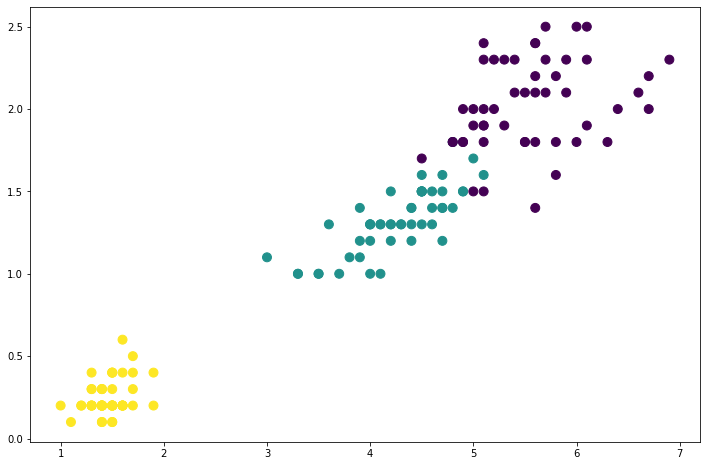

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(data['petal.length'],data['petal.width'],s=80, c=numeric_labels(data['variety']))

In [35]:
features=data[['petal.length','petal.width']]

In [36]:
model= Kmeans()

In [37]:
help(model.train)

Help on method train in module clustering._k_means:

train(features, n_centroids, moviment_limit=0.1, history_train=True) method of clustering._k_means.Kmeans instance



In [38]:
hist_train=model.train(features=features, n_centroids=3)

Iter: 1 	 ==================================================> 	 moviment: 0.78
Iter: 2 	 ==================================================> 	 moviment: 0.33
Iter: 3 	 ==================================================> 	 moviment: 0.12
Iter: 4 	 ==================================================> 	 moviment: 0.03


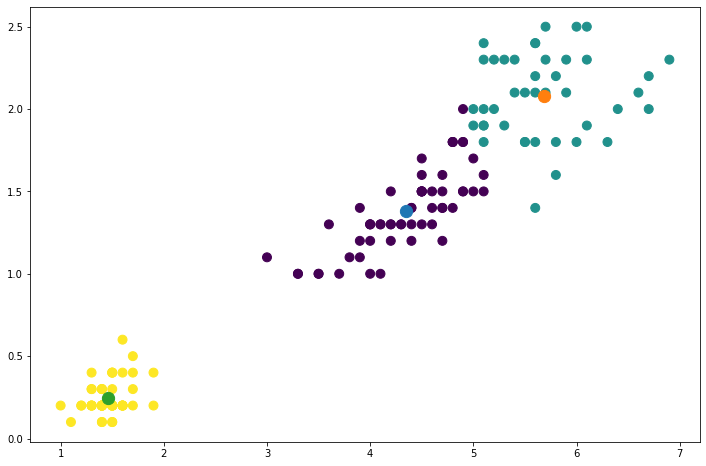

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(data['petal.length'],data['petal.width'],s=80, c=model.labels)

for centroid in model.centroids:
    plt.scatter(centroid[0],centroid[1], s=150)